# PROJECT INTRODUCTION

## Project Name
Deep Learning for Botnet and Intrusion Detection

## Team members

1. Nilay Anand
2. Trieu Vo

# PROBLEM UNDERSTANDING

## Problem statement
The increasing number of cyber attacks and the growth of botnets have made it necessary for businesses to deploy advanced security measures to detect and prevent intrusions. Traditional intrusion detection systems (IDS) often rely on signature-based approaches to detect known threats, making them ineffective against new or unknown attacks. As a result, businesses need a more sophisticated and adaptive approach to detect and prevent these attacks.

## Questions

1. How can we categorize the botnet traffic and detect infected machines? 

2. What are the most essential factors influencing classification? 

3. What is the Effectiveness of model against a novel botnet not seen by the model? 

# DATA COLLECTION

## Data Source
CTU-13 Dataset from The Stratosphere IPS.

Link: https://www.stratosphereips.org/datasets-overview

# DATA UNDERSTANDING

## Data Description
This CTU-13 dataset of botnet traffic is captured at CTU University, Czech Republic in 2011 and provided by the Stratosphere Lab. It is comprised of 15 features: StartTime, Dur, Proto, SrcAddr, Sport, Dir, DstAddr, Dport, State, sTos, dTos, TotPkts, TotBytes, SrcBytes, Label. Each of these features describes a different component of the captured packet. The data also consists of the byte code of the data sent within the packets that may be used to detect suspicious activity. 

## Data Shape

... observations and 15 features

## Data Dictionary
There are 15 features in this dataset and their description are as follows:

| Feature | Meaning |
| ----------- | ----------- |
| StartTime | The start time of the capture |
| Dur | The duration of the capture |
| Proto | The protocol |
| SrcAddr | The source address (IP address) |	
| Sport | The source port |
| Dir | The direction of  |
| DstAddr | The destination address |
| Dport | The destination port |
| State | The state ??? |
| sTos | The source type of service |
| dTos | The destination type of service |c
| TotPkts | Total packets: the total number of packets that have been transmitted between two network devices, including both data and control packets |
| TotBytes | Total bytes: the total amount of data that has been transmitted between two network devices, including both data and control packets |
| SrcBytes | Source bytes: the amount of data that has been transmitted from the source device to the destination device, excluding any control packets |
| Label | The type of the capture (background, botnet and normal) |

# DATA EXPLORATION

## Import library

In [ ]:
# Data Collection, Data Cleaning & Data Manipulation 
import numpy as np 
import pandas as pd 
from sklearn import datasets
import os

# Data Visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Data Transformation
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy import stats

# Models Building 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

## Classification Problems
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn. ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

## Regression Problems
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Preprossesing
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter

# Machine Pipeline

# Explainbale AI (XAI)
# !pip install lime
# import lime.lime_tabular
# !pip install shap
# import shap

# Helper library 
import ipaddress

# Unsupervised Learning: Clustering
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, Birch, MeanShift, SpectralClustering
from sklearn.metrics import adjusted_rand_score

## Import data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
root = "gdrive/MyDrive/CTU-13-Dataset"

sub_folders = [name for name in os.listdir(root)]

print(sub_folders)

['10', '1', '2', '3', '5', '6', '7', '8', '12', '13', '9', '4', '11']


## Using 6 bots for training and 1 bot for testing

In [ ]:
df = pd.DataFrame()
test_set_2 = pd.DataFrame()

for index, folder in enumerate(sub_folders):
  for file in os.listdir(os.path.join(root, folder)):
    if file.endswith(".binetflow"):
      if "sogou" in file:
        test_set_2 = pd.concat([test_set_2,pd.read_csv(os.path.join(root, folder+"/" + file))],ignore_index=True)
      else:
        df = pd.concat([df,pd.read_csv(os.path.join(root, folder+"/" + file))],ignore_index=True)

        # df = pd.concat([df,pd.read_csv(os.path.join(root, folder+"/" + file))],ignore_index=True)
        # df = df.append(pd.read_csv(os.path.join(root, folder+"/" + file)))

## RBOT

In [ ]:
# # RBOT
# df = pd.DataFrame()
# for index, folder in enumerate(sub_folders):
#   if folder == '10' or folder == '3' or folder == '4':
#     for file in os.listdir(os.path.join(root, folder)):
#       if file.endswith(".binetflow"):
#         df = pd.concat([df,pd.read_csv(os.path.join(root, folder+"/" + file))],ignore_index=True)
#         df = df.append(pd.read_csv(os.path.join(root, folder+"/" + file)))

In [ ]:
# df = df.reset_index(drop = True)

In [ ]:
# # RBOT
# for index, folder in enumerate(sub_folders):
#   if folder == '11':
#     for file in os.listdir(os.path.join(root, folder)):
#       if file.endswith(".binetflow"):
#         test_set_2 = pd.concat([test_set_2,pd.read_csv(os.path.join(root, folder+"/" + file))],ignore_index=True)
#         test_set_2 = pd.read_csv(os.path.join(root, folder+"/" + file))

## NERIS

In [ ]:
# # NERIS
# df = pd.DataFrame()
# for index, folder in enumerate(sub_folders):
#   if folder == '9' or folder == '2':
#     for file in os.listdir(os.path.join(root, folder)):
#       if file.endswith(".binetflow"):
#         if ""
#           df = pd.concat([df,pd.read_csv(os.path.join(root, folder+"/" + file))],ignore_index=True)
#         #df = df.append(pd.read_csv(os.path.join(root, folder+"/" + file)))

<ipython-input-7-6cbf59b01abb>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_csv(os.path.join(root, folder+"/" + file)))
<ipython-input-7-6cbf59b01abb>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_csv(os.path.join(root, folder+"/" + file)))


In [ ]:
df = df.reset_index(drop = True)

In [ ]:
# # NERIS
# test_set_2 = pd.DataFrame()
# for index, folder in enumerate(sub_folders):
#   if folder == '1':
#     for file in os.listdir(os.path.join(root, folder)):
#       if file.endswith(".binetflow"):
#         test_set_2 = pd.concat([test_set_2,pd.read_csv(os.path.join(root, folder+"/" + file))],ignore_index=True)
#         #test_set_2 = pd.read_csv(os.path.join(root, folder+"/" + file))

## Check data points

In [ ]:
df.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/18 10:21:46.633335,1.060248,tcp,93.45.239.29,1611,->,147.32.84.118,6881,S_RA,0.0,0.0,4,252,132,flow=Background-TCP-Attempt
1,2011/08/18 10:19:49.027650,279.349152,tcp,62.240.166.118,1031,<?>,147.32.84.229,13363,SRPA_PA,0.0,0.0,15,1318,955,flow=Background-TCP-Attempt
2,2011/08/18 10:22:07.160628,166.390015,tcp,147.32.86.148,58067,->,66.235.132.232,80,SR_SA,0.0,0.0,3,212,134,flow=Background-TCP-Established
3,2011/08/18 10:26:02.052163,1.187083,tcp,147.32.3.51,3130,->,147.32.84.46,10010,S_RA,0.0,0.0,4,244,124,flow=Background-TCP-Attempt
4,2011/08/18 10:26:52.226748,0.980571,tcp,88.212.37.169,3134,->,147.32.84.118,6881,S_RA,0.0,0.0,4,244,124,flow=Background-TCP-Attempt


In [ ]:
df.sample(5)

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
2783391,2011/08/10 12:58:46.997233,0.000205,udp,147.32.84.138,45166,<->,147.32.80.9,53,CON,0.0,0.0,2,214,81,flow=To-Background-UDP-CVUT-DNS-Server
10547490,2011/08/15 09:48:46.621241,0.000479,udp,147.32.87.48,4592,->,147.32.86.243,161,INT,0.0,NaN,2,262,262,flow=Background-UDP-Attempt
13246330,2011/08/17 01:10:56.820479,0.359682,tcp,212.51.111.137,26941,->,147.32.84.229,80,SRA_SA,0.0,0.0,4,278,200,flow=Background-TCP-Established
746456,2011/08/18 13:11:06.743303,12.875492,udp,147.32.84.229,13363,<->,87.121.159.154,4347,CON,0.0,0.0,4,1044,924,flow=Background-UDP-Established
3744191,2011/08/10 15:03:09.308907,0.000271,udp,147.32.84.138,42131,<->,147.32.80.9,53,CON,0.0,0.0,2,214,81,flow=To-Background-UDP-CVUT-DNS-Server


## Check data shape

In [ ]:
df.shape

(19862623, 15)

In [ ]:
test_set_2.shape

(114077, 15)

## Check data structure

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19862623 entries, 0 to 19862622
Data columns (total 15 columns):
 #   Column     Dtype  
---  ------     -----  
 0   StartTime  object 
 1   Dur        float64
 2   Proto      object 
 3   SrcAddr    object 
 4   Sport      object 
 5   Dir        object 
 6   DstAddr    object 
 7   Dport      object 
 8   State      object 
 9   sTos       float64
 10  dTos       float64
 11  TotPkts    int64  
 12  TotBytes   int64  
 13  SrcBytes   int64  
 14  Label      object 
dtypes: float64(3), int64(3), object(9)
memory usage: 2.2+ GB


## Check summary statistics

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Dur,19862623.0,289.114361,8.338263e+02,0.0,0.000274,0.000725,1.970382,3.657061e+03
sTos,19642768.0,0.081838,3.916225e+00,0.0,0.000000,0.000000,0.000000,1.920000e+02
dTos,18151643.0,0.000403,3.226555e-02,0.0,0.000000,0.000000,0.000000,3.000000e+00
TotPkts,19862623.0,41.253253,5.556862e+03,1.0,2.000000,2.000000,4.000000,1.658064e+07
TotBytes,19862623.0,32206.730734,3.988625e+06,60.0,214.000000,264.000000,619.000000,4.376239e+09
SrcBytes,19862623.0,6420.352433,1.672545e+06,0.0,78.000000,83.000000,304.000000,3.423408e+09


## Check the target variable

In [ ]:
df['Label'].unique()

array(['flow=Background-TCP-Attempt', 'flow=Background-TCP-Established',
       'flow=Background-Established-cmpgw-CVUT', ...,
       'flow=Normal-V52-HTTP-windowsupdate',
       'flow=From-Normal-V52-CVUT-WebServer',
       'flow=From-Normal-V52-MatLab-Server'], dtype=object)

In [ ]:
def convert_target(value):
  if 'Background' in value or 'Normal' in value:
    return 0
  return 1

In [ ]:
df['Target'] = df['Label'].apply(convert_target)
test_set_2['Target'] = test_set_2['Label'].apply(convert_target)

In [ ]:
df['Target'].value_counts()

0    19417987
1      444636
Name: Target, dtype: int64

In [ ]:
test_set_2['Target'].value_counts()

0    114014
1        63
Name: Target, dtype: int64

In [ ]:
df.sample(5)

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Target
15646774,2011/08/16 00:34:22.393484,0.000178,udp,147.32.85.25,54717,<->,147.32.80.9,53,CON,0.0,0.0,2,208,79,flow=To-Background-UDP-CVUT-DNS-Server,0
1416517,2011/08/10 09:59:02.887508,2389.864746,udp,188.168.85.103,54381,<->,147.32.84.229,13363,CON,0.0,0.0,38,4674,2739,flow=Background-UDP-Established,0
10821395,2011/08/16 10:09:48.311243,0.000567,udp,109.192.42.218,57359,<->,147.32.84.229,13363,CON,0.0,0.0,2,561,75,flow=Background-UDP-Established,0
18766880,2011/08/15 11:28:28.189367,0.000496,udp,147.32.84.138,54009,<->,147.32.80.9,53,CON,0.0,0.0,2,214,81,flow=To-Background-UDP-CVUT-DNS-Server,0
17762294,2011/08/17 15:24:41.332573,0.002124,udp,65.163.0.14,34737,<->,147.32.86.165,12114,CON,0.0,0.0,2,519,459,flow=Background-UDP-Established,0


# TRAIN-TEST SPLIT

In [ ]:
train_set, test_set = train_test_split(df, stratify=df['Target'], test_size=0.2, random_state=42 )

# DATA CLEANING

## Check the column names

In [ ]:
train_set.columns

Index(['StartTime', 'Dur', 'Proto', 'SrcAddr', 'Sport', 'Dir', 'DstAddr',
       'Dport', 'State', 'sTos', 'dTos', 'TotPkts', 'TotBytes', 'SrcBytes',
       'Label', 'Target'],
      dtype='object')

## Find and deal with missing values

In [ ]:
train_set.isnull().sum()

StartTime          0
Dur                0
Proto              0
SrcAddr            0
Sport         162160
Dir                0
DstAddr            0
Dport         154906
State           1083
sTos          176082
dTos         1368846
TotPkts            0
TotBytes           0
SrcBytes           0
Label              0
Target             0
dtype: int64

In [ ]:
test_set.isnull().sum()

StartTime         0
Dur               0
Proto             0
SrcAddr           0
Sport         40384
Dir               0
DstAddr           0
Dport         38645
State           295
sTos          43773
dTos         342134
TotPkts           0
TotBytes          0
SrcBytes          0
Label             0
Target            0
dtype: int64

In [ ]:
test_set_2.isnull().sum()

StartTime       0
Dur             0
Proto           0
SrcAddr         0
Sport         541
Dir             0
DstAddr         0
Dport         511
State           0
sTos          670
dTos         7031
TotPkts         0
TotBytes        0
SrcBytes        0
Label           0
Target          0
dtype: int64

State    0.006816
Dport    0.974859
Sport    1.020510
sTos     1.108124
dTos     8.614459
dtype: float64


<Axes: title={'center': 'Missing values (%)'}>

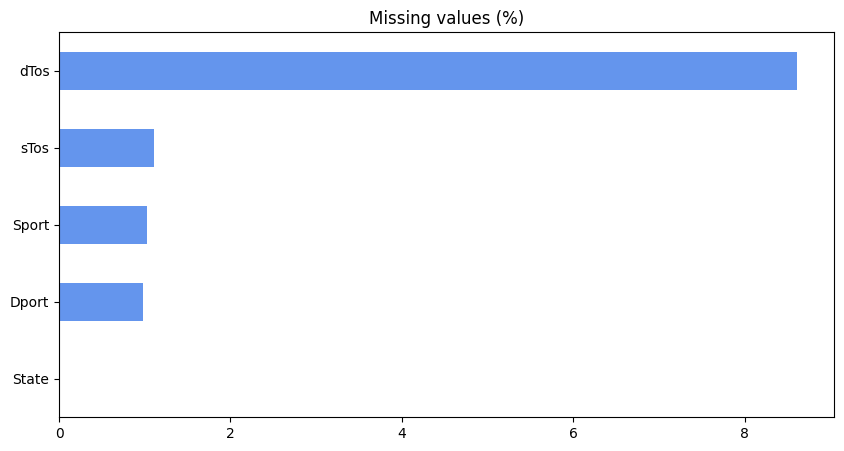

In [ ]:
# Get percentage of missing values per column
percent_missing = train_set.isnull().mean()*100

percent_missing = percent_missing[percent_missing > 0]

percent_missing = percent_missing.sort_values()

print(percent_missing)

percent_missing.plot(kind="barh", figsize=(10, 5), title = 'Missing values (%)', color = 'cornflowerblue')

### Replace missing values

In [ ]:
percent_missing.index

Index(['State', 'Dport', 'Sport', 'sTos', 'dTos'], dtype='object')

In [ ]:
# most_frequent_df = train_set.mode().iloc[0]
train_set = train_set.fillna(train_set.mode().iloc[0])
test_set = test_set.fillna(test_set.mode().iloc[0])
test_set_2 = test_set_2.fillna(test_set_2.mode().iloc[0])

In [ ]:
train_set.isnull().sum()

StartTime    0
Dur          0
Proto        0
SrcAddr      0
Sport        0
Dir          0
DstAddr      0
Dport        0
State        0
sTos         0
dTos         0
TotPkts      0
TotBytes     0
SrcBytes     0
Label        0
Target       0
dtype: int64

# DATA TRANSFORMATION

## Categorical data

Get all categorical variables:

In [ ]:
categorical_df = train_set.select_dtypes(include = 'object')
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15890098 entries, 7696554 to 5022600
Data columns (total 9 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   StartTime  object
 1   Proto      object
 2   SrcAddr    object
 3   Sport      object
 4   Dir        object
 5   DstAddr    object
 6   Dport      object
 7   State      object
 8   Label      object
dtypes: object(9)
memory usage: 1.2+ GB


Count the number of unique values in each categorical variable:

In [ ]:
for col in categorical_df.columns:
    print(f'{col}: {categorical_df[col].nunique()}')
    print('\n')

StartTime: 15890079


Proto: 19


SrcAddr: 1786882


Sport: 113399


Dir: 7


DstAddr: 470187


Dport: 105219


State: 437


Label: 1336




### 'SrcAddr' and 'DstAddr': Convert IP address

In [ ]:
def convert_ip(ip_address):
  '''Takes a string input, determines if it is IPv4 Address, if true
  converts it to a 32 bit integer else returns -1'''
  try:
    if (str(type(ipaddress.ip_address(ip_address))) == "<class 'ipaddress.IPv4Address'>"):
      #print(int(ipaddress.IPv4Address(address)))
      return int(ipaddress.IPv4Address(ip_address))
    else:
      return np.nan
    #print(str(type(ipaddress.ip_address(address))))
  except:
    return np.nan

In [ ]:
train_set["SrcAddr"] = train_set["SrcAddr"].apply(convert_ip)
train_set["DstAddr"] = train_set["DstAddr"].apply(convert_ip)

test_set["SrcAddr"] = test_set["SrcAddr"].apply(convert_ip)
test_set["DstAddr"] = test_set["DstAddr"].apply(convert_ip)

test_set_2["SrcAddr"] = test_set_2["SrcAddr"].apply(convert_ip)
test_set_2["DstAddr"] = test_set_2["DstAddr"].apply(convert_ip)

In [ ]:
train_set.isnull().sum()

StartTime       0
Dur             0
Proto           0
SrcAddr      1285
Sport           0
Dir             0
DstAddr      1285
Dport           0
State           0
sTos            0
dTos            0
TotPkts         0
TotBytes        0
SrcBytes        0
Label           0
Target          0
dtype: int64

In [ ]:
train_set.dropna(inplace = True)
test_set.dropna(inplace = True)
test_set_2.dropna(inplace = True)

In [ ]:
train_set.isnull().sum()

StartTime    0
Dur          0
Proto        0
SrcAddr      0
Sport        0
Dir          0
DstAddr      0
Dport        0
State        0
sTos         0
dTos         0
TotPkts      0
TotBytes     0
SrcBytes     0
Label        0
Target       0
dtype: int64

### 'Sport' and 'Dport': Convert to numerical values

In [ ]:
def hex_to_int(value):
  try:
    value = int(value)
  except:
    value = int(value, base = 16)
  return value

In [ ]:
train_set['Sport'] = train_set['Sport'].apply(hex_to_int)
train_set['Dport'] = train_set['Dport'].apply(hex_to_int)

test_set['Sport'] = test_set['Sport'].apply(hex_to_int)
test_set['Dport'] = test_set['Dport'].apply(hex_to_int)

test_set_2['Sport'] = test_set_2['Sport'].apply(hex_to_int)
test_set_2['Dport'] = test_set_2['Dport'].apply(hex_to_int)

### 'Dir': Fix wrong values

In [ ]:
train_set.Dir.value_counts()

  <->    11402234
   ->     4275125
  <-       126616
  <?>       47781
   ?>       28592
  who        8441
  <?           24
Name: Dir, dtype: int64

In [ ]:
train_set['Dir'] = train_set['Dir'].str.strip().replace('\?','-',regex = True)
test_set['Dir'] = test_set['Dir'].str.strip().replace('\?','-',regex = True)
test_set_2['Dir'] = test_set_2['Dir'].str.strip().replace('\?','-',regex = True)

In [ ]:
train_set.drop(train_set[train_set['Dir'] == 'who'].index, inplace = True)
test_set.drop(test_set[test_set['Dir'] == 'who'].index, inplace = True)
test_set_2.drop(test_set_2[test_set_2['Dir'] == 'who'].index, inplace = True)

In [ ]:
train_set['Dir'].value_counts()

<->    11450015
->      4303717
<-       126640
Name: Dir, dtype: int64

### 'Proto' and 'Dir': Convert using One Hot Encoding

In [ ]:
train_set.Proto.value_counts()

udp      11946544
tcp       3486516
icmp       395997
igmp        30746
rtp         11172
rtcp         9059
pim           116
ipv6          101
udt            55
esp            40
unas           16
rsvp            7
gre             2
ipnip           1
Name: Proto, dtype: int64

In [ ]:
train_set.Proto.nunique()

14

In [ ]:
# Categorical columns in the training data
object_cols = [col for col in train_set.columns if train_set[col].dtype =="object"]

# Columns that will be one-hot encoded
low_cardinality_cols = [col for col in object_cols if train_set[col].nunique() <= 15]

In [ ]:
low_cardinality_cols

['Proto', 'Dir']

In [ ]:
test_set.shape

(3970161, 16)

In [ ]:
test_set_2.shape

(114004, 16)

In [ ]:
# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(train_set[low_cardinality_cols]))
OH_cols_test = pd.DataFrame(OH_encoder.transform(test_set[low_cardinality_cols]))
OH_cols_test_2 = pd.DataFrame(OH_encoder.transform(test_set_2[low_cardinality_cols]))

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
OH_cols_test.shape

(3970161, 17)

In [ ]:
OH_cols_test.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
dtype: int64

In [ ]:
OH_cols_test_2.shape

(114004, 17)

In [ ]:
OH_cols_test_2.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
dtype: int64

In [ ]:
OH_encoder.get_feature_names_out()

array(['Proto_esp', 'Proto_gre', 'Proto_icmp', 'Proto_igmp',
       'Proto_ipnip', 'Proto_ipv6', 'Proto_pim', 'Proto_rsvp',
       'Proto_rtcp', 'Proto_rtp', 'Proto_tcp', 'Proto_udp', 'Proto_udt',
       'Proto_unas', 'Dir_->', 'Dir_<-', 'Dir_<->'], dtype=object)

In [ ]:
OH_cols_train.columns = OH_encoder.get_feature_names_out()
OH_cols_test.columns = OH_encoder.get_feature_names_out()
OH_cols_test_2.columns = OH_encoder.get_feature_names_out()

# One-hot encoding removed index; put it back
OH_cols_train.index = train_set.index
OH_cols_test.index = test_set.index
OH_cols_test_2.index = test_set_2.index

In [ ]:
OH_cols_test_2.shape

(114004, 17)

In [ ]:
# Remove categorical columns (will replace with one-hot encoding)
num_train_set = train_set.drop(object_cols, axis=1)
num_test_set = test_set.drop(object_cols, axis=1)
num_test_set_2 = test_set_2.drop(object_cols, axis=1)

In [ ]:
num_test_set_2.shape

(114004, 11)

In [ ]:
# Add one-hot encoded columns to numerical features
OH_train_set = pd.concat([num_train_set, OH_cols_train], axis=1)
OH_test_set = pd.concat([num_test_set, OH_cols_test], axis=1)
OH_test_set_2 = pd.concat([num_test_set_2, OH_cols_test_2], axis=1)

In [ ]:
OH_test_set_2.shape

(114004, 28)

In [ ]:
OH_test_set_2['Target'].value_counts()

0    113941
1        63
Name: Target, dtype: int64

In [ ]:
OH_test_set_2.isnull().sum()

Dur            0
SrcAddr        0
Sport          0
DstAddr        0
Dport          0
sTos           0
dTos           0
TotPkts        0
TotBytes       0
SrcBytes       0
Target         0
Proto_esp      0
Proto_gre      0
Proto_icmp     0
Proto_igmp     0
Proto_ipnip    0
Proto_ipv6     0
Proto_pim      0
Proto_rsvp     0
Proto_rtcp     0
Proto_rtp      0
Proto_tcp      0
Proto_udp      0
Proto_udt      0
Proto_unas     0
Dir_->         0
Dir_<-         0
Dir_<->        0
dtype: int64

In [ ]:
OH_test_set_2.shape

(114004, 28)

In [ ]:
OH_test_set_2['Target'].value_counts()

0    113941
1        63
Name: Target, dtype: int64

In [ ]:
OH_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15880372 entries, 7696554 to 5022600
Data columns (total 28 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Dur          float64
 1   SrcAddr      float64
 2   Sport        int64  
 3   DstAddr      float64
 4   Dport        int64  
 5   sTos         float64
 6   dTos         float64
 7   TotPkts      int64  
 8   TotBytes     int64  
 9   SrcBytes     int64  
 10  Target       int64  
 11  Proto_esp    float64
 12  Proto_gre    float64
 13  Proto_icmp   float64
 14  Proto_igmp   float64
 15  Proto_ipnip  float64
 16  Proto_ipv6   float64
 17  Proto_pim    float64
 18  Proto_rsvp   float64
 19  Proto_rtcp   float64
 20  Proto_rtp    float64
 21  Proto_tcp    float64
 22  Proto_udp    float64
 23  Proto_udt    float64
 24  Proto_unas   float64
 25  Dir_->       float64
 26  Dir_<-       float64
 27  Dir_<->      float64
dtypes: float64(22), int64(6)
memory usage: 3.4 GB


In [ ]:
OH_train_set.sample(5)

,Dur,SrcAddr,Sport,DstAddr,Dport,sTos,dTos,TotPkts,TotBytes,SrcBytes,...,Proto_rsvp,Proto_rtcp,Proto_rtp,Proto_tcp,Proto_udp,Proto_udt,Proto_unas,Dir_->,Dir_<-,Dir_<->
6773145,0.000083,2.468370e+09,53900,2.468368e+09,53,0.0,0.0,2,207,66,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
15889598,0.000413,2.468370e+09,64211,2.468368e+09,53,0.0,0.0,2,314,85,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
14200067,0.000269,2.468370e+09,39383,2.468368e+09,53,0.0,0.0,2,304,83,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
19465702,68.751915,1.432212e+09,50007,2.468370e+09,3126,0.0,0.0,11,794,794,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
17296718,0.000324,2.468370e+09,52216,2.468368e+09,53,0.0,0.0,2,214,81,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


# DATA VISUALIZATION AND ANALYSIS

## Summary statistics

In [ ]:
OH_train_set.describe().round(2).transpose()

,count,mean,std,min,25%,50%,75%,max
Dur,15880372.0,2.877200e+02,8.316600e+02,0.0,0.000000e+00,0.000000e+00,1.920000e+00,3.657060e+03
SrcAddr,15880372.0,2.293063e+09,5.790311e+08,0.0,2.468369e+09,2.468370e+09,2.468370e+09,3.758093e+09
Sport,15880372.0,3.785681e+04,1.982874e+04,1.0,1.911100e+04,4.350100e+04,5.407400e+04,6.553500e+04
DstAddr,15880372.0,2.381162e+09,4.851960e+08,1.0,2.468368e+09,2.468368e+09,2.468370e+09,4.294967e+09
Dport,15880372.0,8.958540e+03,8.555244e+05,1.0,5.300000e+01,8.000000e+01,1.336300e+04,5.390334e+08
sTos,15880372.0,8.000000e-02,3.890000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.920000e+02
dTos,15880372.0,0.000000e+00,3.000000e-02,0.0,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
TotPkts,15880372.0,4.129000e+01,5.840120e+03,1.0,2.000000e+00,2.000000e+00,4.000000e+00,1.658064e+07
TotBytes,15880372.0,3.205001e+04,3.912927e+06,60.0,2.140000e+02,2.640000e+02,6.190000e+02,4.376239e+09
SrcBytes,15880372.0,6.586950e+03,1.760087e+06,0.0,7.800000e+01,8.300000e+01,3.040000e+02,3.423408e+09


## Univariate Analysis

### Histogram

array([[<Axes: title={'center': 'Dur'}>,
        <Axes: title={'center': 'SrcAddr'}>,
        <Axes: title={'center': 'Sport'}>,
        <Axes: title={'center': 'DstAddr'}>,
        <Axes: title={'center': 'Dport'}>],
       [<Axes: title={'center': 'sTos'}>,
        <Axes: title={'center': 'dTos'}>,
        <Axes: title={'center': 'TotPkts'}>,
        <Axes: title={'center': 'TotBytes'}>,
        <Axes: title={'center': 'SrcBytes'}>],
       [<Axes: title={'center': 'Target'}>,
        <Axes: title={'center': 'Proto_esp'}>,
        <Axes: title={'center': 'Proto_gre'}>,
        <Axes: title={'center': 'Proto_icmp'}>,
        <Axes: title={'center': 'Proto_igmp'}>],
       [<Axes: title={'center': 'Proto_ipnip'}>,
        <Axes: title={'center': 'Proto_ipv6'}>,
        <Axes: title={'center': 'Proto_pim'}>,
        <Axes: title={'center': 'Proto_rsvp'}>,
        <Axes: title={'center': 'Proto_rtcp'}>],
       [<Axes: title={'center': 'Proto_rtp'}>,
        <Axes: title={'center': 'Prot

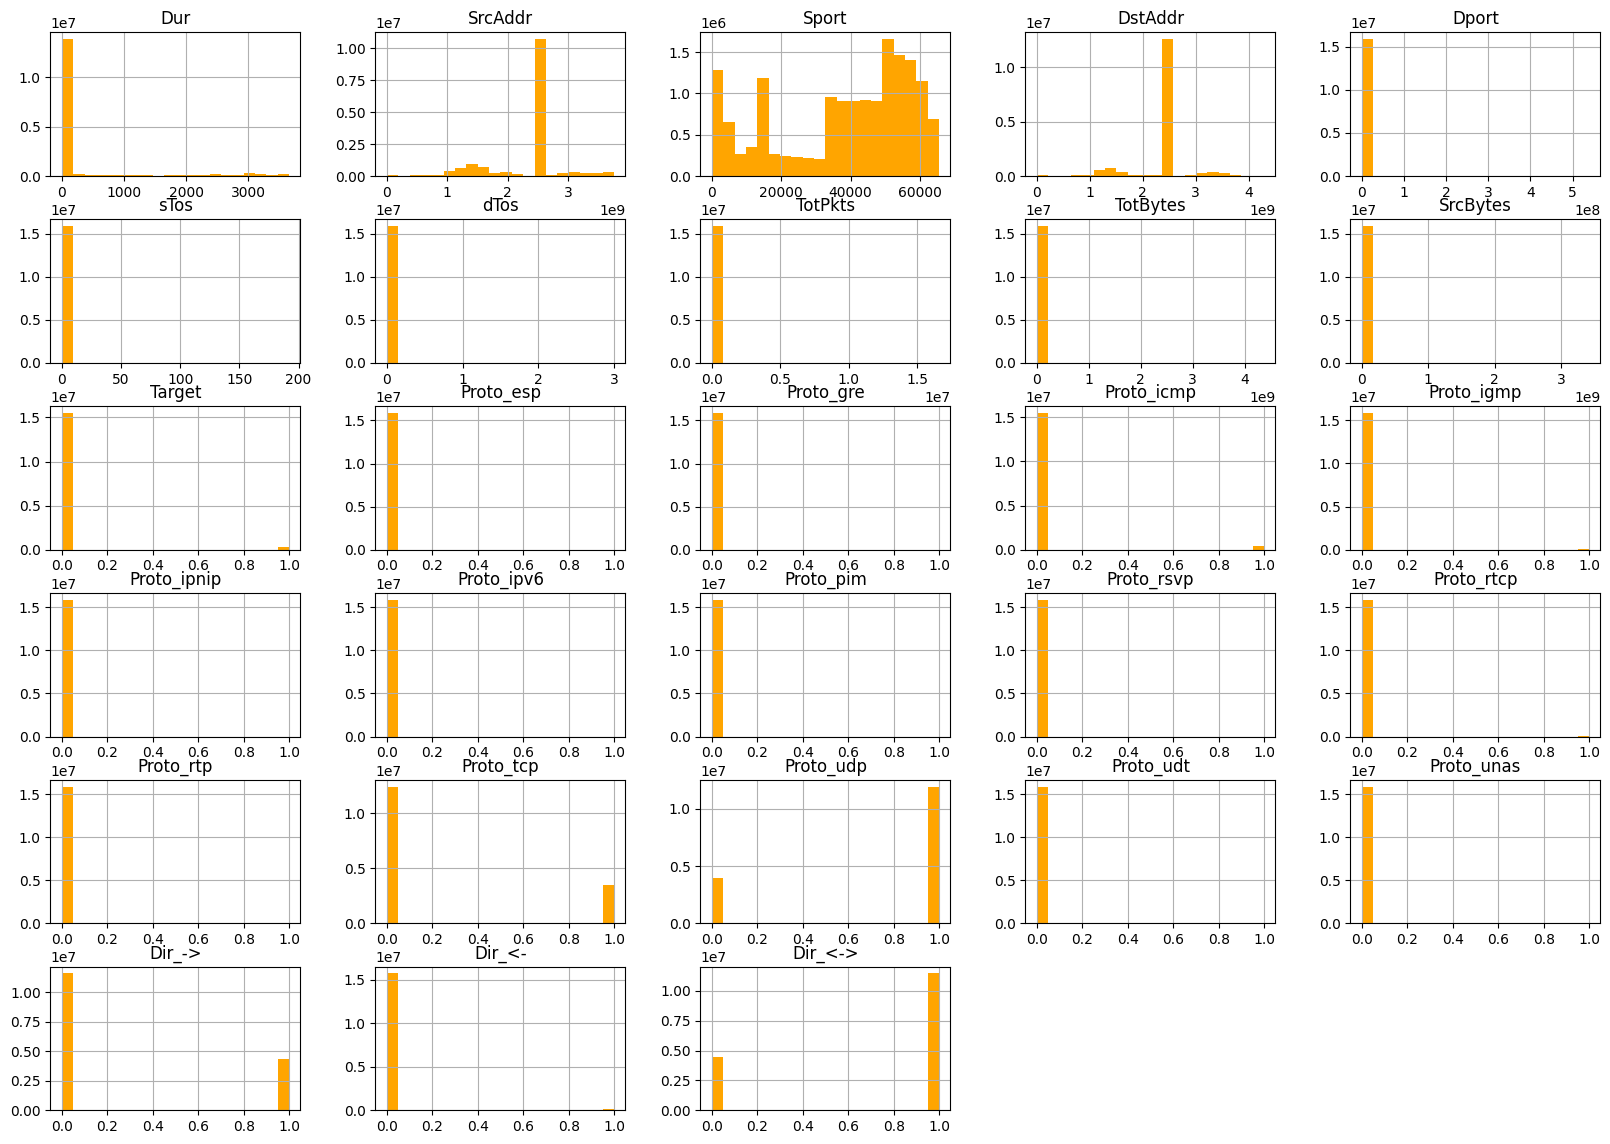

In [ ]:
OH_train_set.hist(bins = 20, color = 'orange', figsize = (20, 14))

### Boxplot

<ipython-input-67-a1881303ce88>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


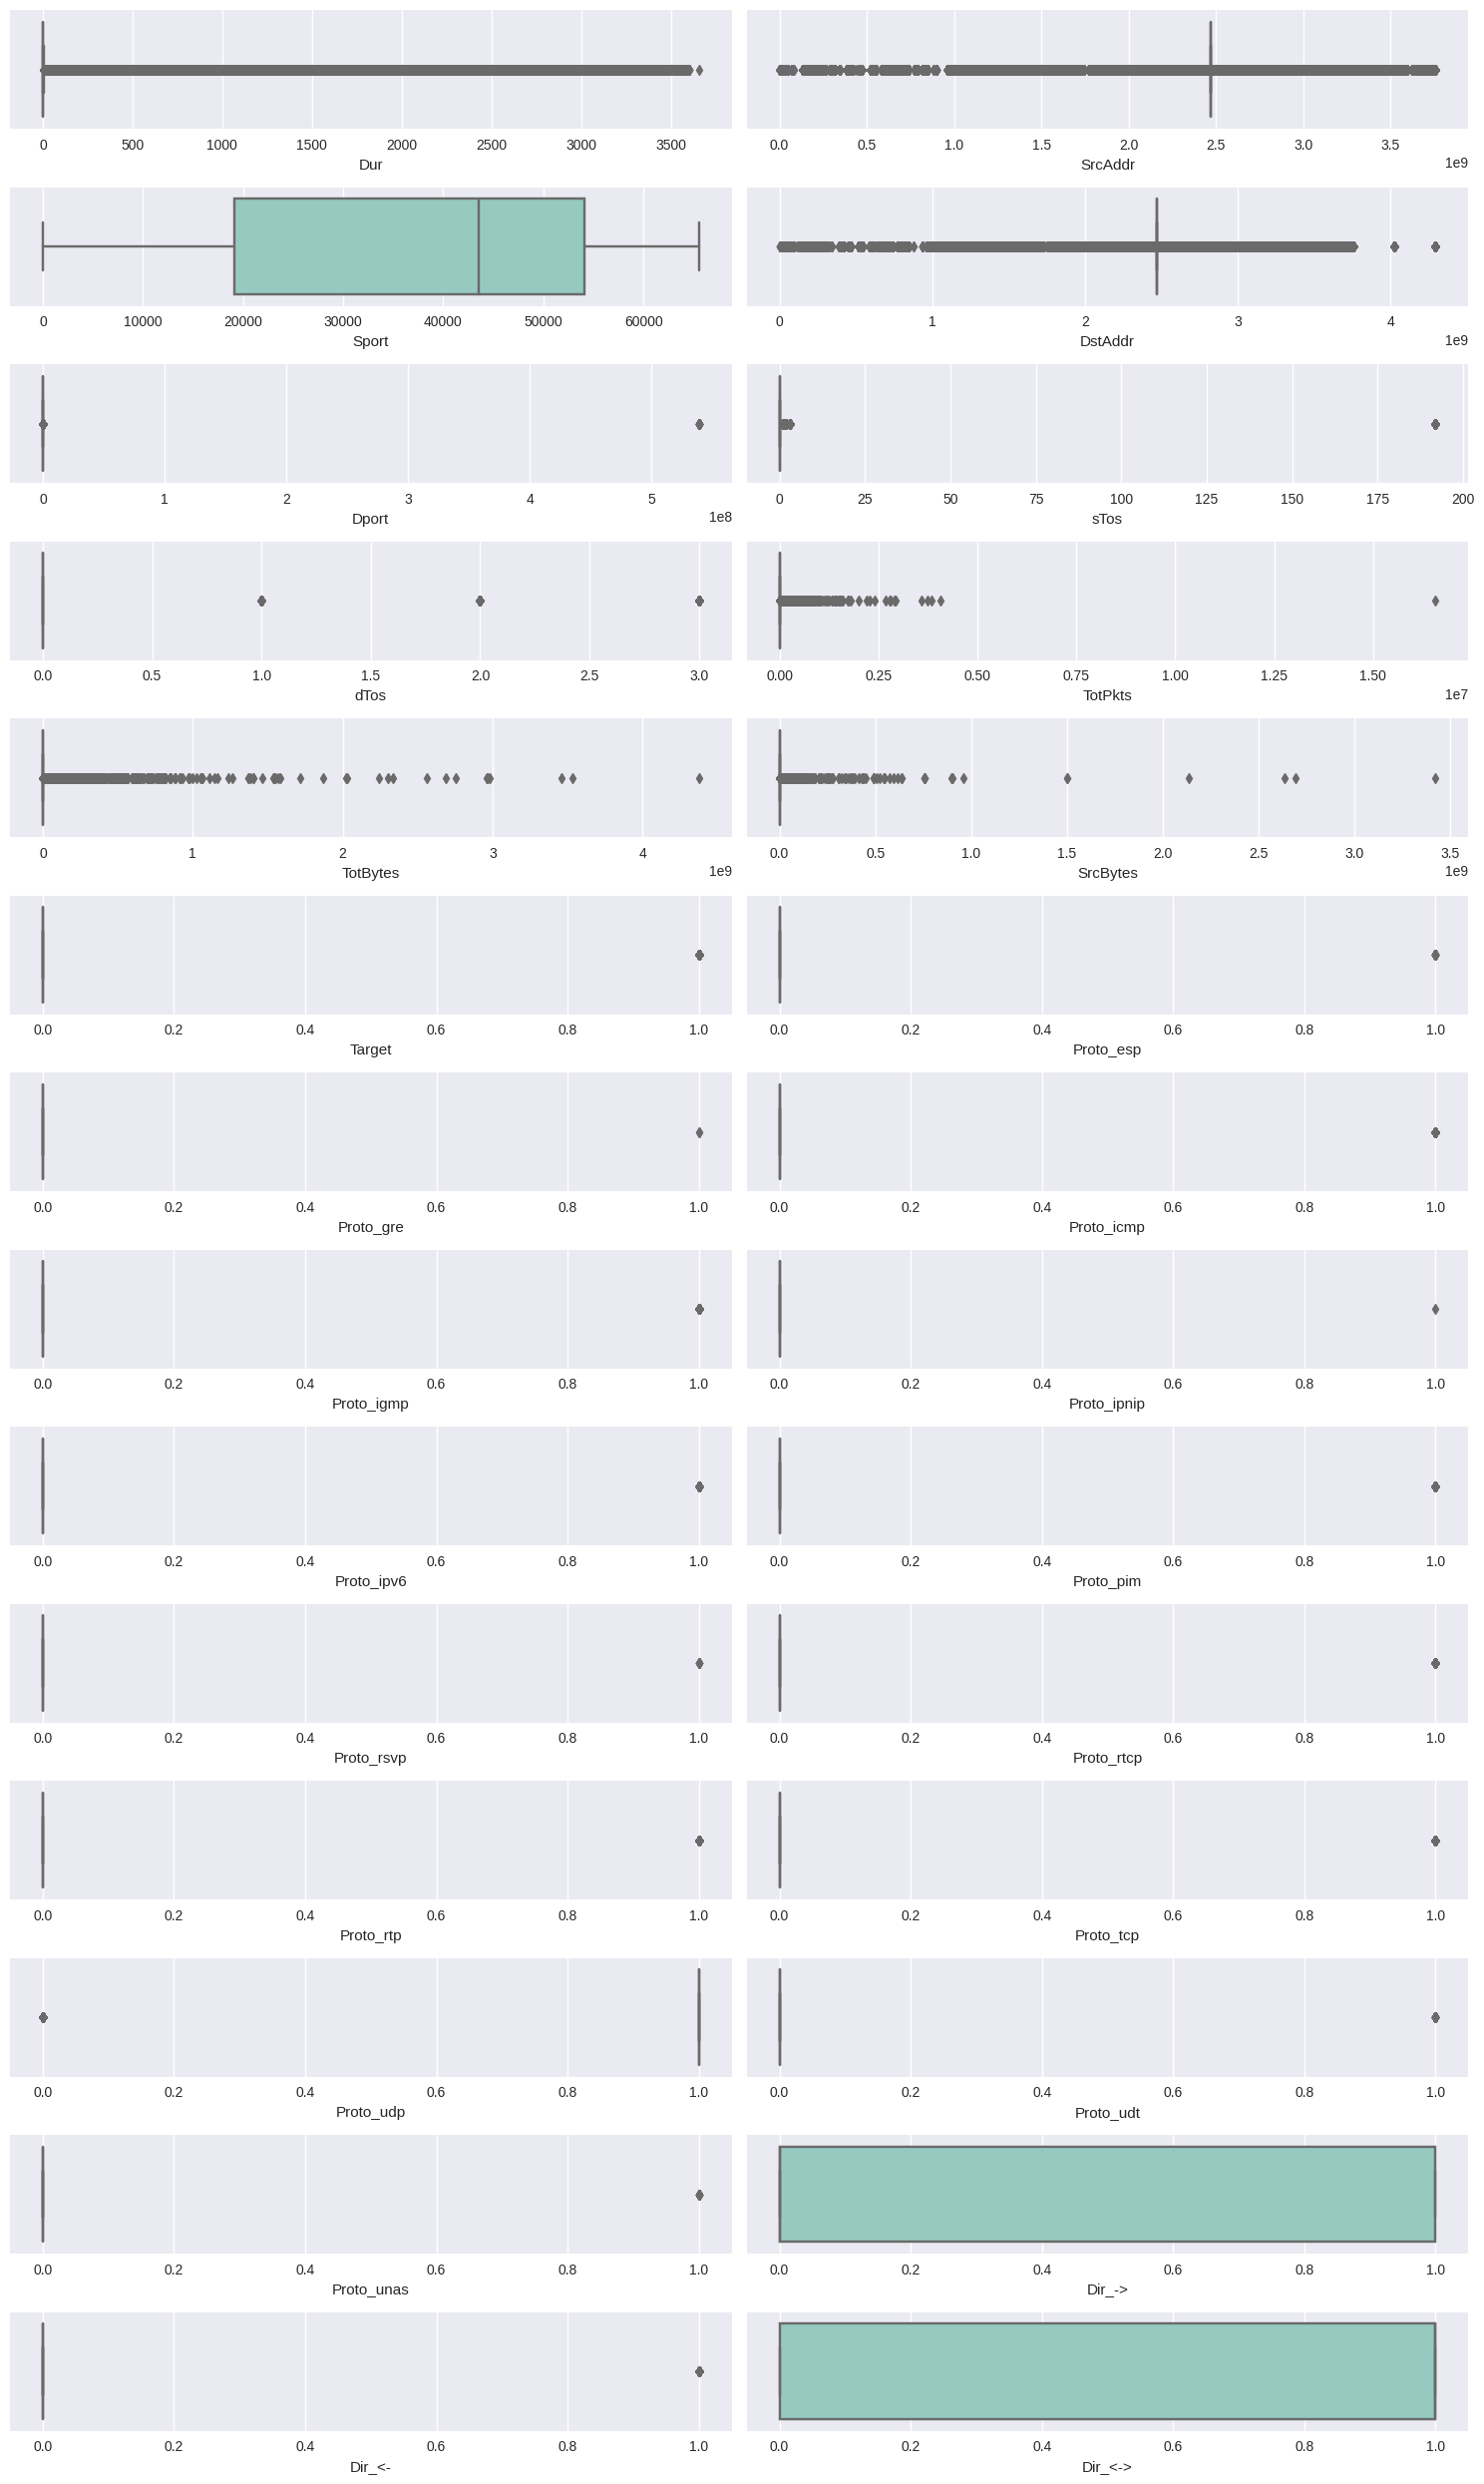

In [ ]:
plt.style.use('seaborn')

names = list(OH_train_set.columns)

plot_per_row = 2

f, axes = plt.subplots(round(len(names)/plot_per_row), plot_per_row, figsize = (15, 25))

y = 0;

for name in names:
    i, j = divmod(y, plot_per_row)
    sns.boxplot(x=OH_train_set[name], ax=axes[i, j], palette = 'Set3')
    y = y + 1

plt.tight_layout()
plt.show()

## Outliers

## Bivariate Analysis

### Linear Correlation Matrix

In [ ]:
corr_matrix = OH_train_set.corr()
corr_matrix.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-68-a149c8907ccc>:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr_matrix.style.background_gradient(cmap='coolwarm').set_precision(2)


,Dur,SrcAddr,Sport,DstAddr,Dport,sTos,dTos,TotPkts,TotBytes,SrcBytes,Target,Proto_esp,Proto_gre,Proto_icmp,Proto_igmp,Proto_ipnip,Proto_ipv6,Proto_pim,Proto_rsvp,Proto_rtcp,Proto_rtp,Proto_tcp,Proto_udp,Proto_udt,Proto_unas,Dir_->,Dir_<-,Dir_<->
Dur,1.00,-0.13,-0.17,-0.05,0.01,-0.00,0.01,0.01,0.01,0.01,-0.05,0.00,0.00,-0.01,-0.02,-0.00,0.00,0.01,0.00,0.02,0.07,-0.12,0.12,0.00,-0.00,-0.12,-0.03,0.12
SrcAddr,-0.13,1.00,0.04,-0.06,-0.00,0.01,0.00,-0.00,-0.00,0.00,0.05,0.00,0.00,0.03,0.01,-0.00,0.00,0.00,-0.00,-0.01,-0.00,0.00,-0.01,-0.00,0.00,-0.00,0.03,-0.00
Sport,-0.17,0.04,1.00,0.08,-0.01,-0.03,-0.01,-0.00,-0.00,-0.00,-0.21,-0.00,-0.00,-0.21,-0.05,-0.00,-0.00,-0.00,-0.00,-0.01,-0.02,-0.12,0.20,-0.00,-0.00,-0.22,-0.11,0.24
DstAddr,-0.05,-0.06,0.08,1.00,-0.00,0.06,-0.01,-0.00,-0.00,-0.00,0.03,0.00,-0.00,0.00,0.13,0.00,0.00,0.01,0.00,-0.00,-0.01,-0.13,0.11,-0.00,0.00,-0.12,0.02,0.12
Dport,0.01,-0.00,-0.01,-0.00,1.00,-0.00,0.00,0.00,0.00,0.01,-0.00,1.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00
sTos,-0.00,0.01,-0.03,0.06,-0.00,1.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.44,-0.00,-0.00,0.11,-0.00,-0.00,-0.00,-0.01,-0.03,-0.00,-0.00,0.03,-0.00,-0.03
dTos,0.01,0.00,-0.01,-0.01,0.00,0.00,1.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00
TotPkts,0.01,-0.00,-0.00,-0.00,0.00,-0.00,0.00,1.00,0.71,0.40,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.01,-0.01,-0.00,-0.00,0.01,-0.00,-0.01
TotBytes,0.01,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.71,1.00,0.51,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.01,-0.01,-0.00,-0.00,0.01,-0.00,-0.01
SrcBytes,0.01,0.00,-0.00,-0.00,0.01,-0.00,0.00,0.40,0.51,1.00,0.00,0.01,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00


# FEATURE SELECTION

## Feature Selection

In [ ]:
 drop_col = ['Proto_esp', 'TotPkts', 'Dir_<->', 'Dir_->']
 OH_train_set = OH_train_set.drop(labels = drop_col, axis = 1)
 OH_test_set = OH_test_set.drop(labels = drop_col, axis = 1)
 OH_test_set_2 = OH_test_set_2.drop(labels = drop_col, axis = 1)

In [ ]:
corr_matrix = OH_train_set.corr()
corr_matrix.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-70-a149c8907ccc>:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr_matrix.style.background_gradient(cmap='coolwarm').set_precision(2)


,Dur,SrcAddr,Sport,DstAddr,Dport,sTos,dTos,TotBytes,SrcBytes,Target,Proto_gre,Proto_icmp,Proto_igmp,Proto_ipnip,Proto_ipv6,Proto_pim,Proto_rsvp,Proto_rtcp,Proto_rtp,Proto_tcp,Proto_udp,Proto_udt,Proto_unas,Dir_<-
Dur,1.00,-0.13,-0.17,-0.05,0.01,-0.00,0.01,0.01,0.01,-0.05,0.00,-0.01,-0.02,-0.00,0.00,0.01,0.00,0.02,0.07,-0.12,0.12,0.00,-0.00,-0.03
SrcAddr,-0.13,1.00,0.04,-0.06,-0.00,0.01,0.00,-0.00,0.00,0.05,0.00,0.03,0.01,-0.00,0.00,0.00,-0.00,-0.01,-0.00,0.00,-0.01,-0.00,0.00,0.03
Sport,-0.17,0.04,1.00,0.08,-0.01,-0.03,-0.01,-0.00,-0.00,-0.21,-0.00,-0.21,-0.05,-0.00,-0.00,-0.00,-0.00,-0.01,-0.02,-0.12,0.20,-0.00,-0.00,-0.11
DstAddr,-0.05,-0.06,0.08,1.00,-0.00,0.06,-0.01,-0.00,-0.00,0.03,-0.00,0.00,0.13,0.00,0.00,0.01,0.00,-0.00,-0.01,-0.13,0.11,-0.00,0.00,0.02
Dport,0.01,-0.00,-0.01,-0.00,1.00,-0.00,0.00,0.00,0.01,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00
sTos,-0.00,0.01,-0.03,0.06,-0.00,1.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.44,-0.00,-0.00,0.11,-0.00,-0.00,-0.00,-0.01,-0.03,-0.00,-0.00,-0.00
dTos,0.01,0.00,-0.01,-0.01,0.00,0.00,1.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00
TotBytes,0.01,-0.00,-0.00,-0.00,0.00,-0.00,0.00,1.00,0.51,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.01,-0.01,-0.00,-0.00,-0.00
SrcBytes,0.01,0.00,-0.00,-0.00,0.01,-0.00,0.00,0.51,1.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00
Target,-0.05,0.05,-0.21,0.03,-0.00,-0.00,-0.00,-0.00,0.00,1.00,-0.00,0.23,-0.01,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.07,-0.15,-0.00,-0.00,-0.01


In [ ]:
OH_train_set.shape

(15880372, 24)

In [ ]:
OH_test_set.shape

(3970161, 24)

In [ ]:
OH_test_set_2.shape

(114004, 24)

## Features-Target Split

In [ ]:
OH_test_set_2.isnull().sum()

Dur            0
SrcAddr        0
Sport          0
DstAddr        0
Dport          0
sTos           0
dTos           0
TotBytes       0
SrcBytes       0
Target         0
Proto_gre      0
Proto_icmp     0
Proto_igmp     0
Proto_ipnip    0
Proto_ipv6     0
Proto_pim      0
Proto_rsvp     0
Proto_rtcp     0
Proto_rtp      0
Proto_tcp      0
Proto_udp      0
Proto_udt      0
Proto_unas     0
Dir_<-         0
dtype: int64

In [ ]:
X_train = OH_train_set.copy()
y_train = X_train.pop("Target")

In [ ]:
X_test = OH_test_set.copy()
y_test = X_test.pop("Target")

In [ ]:
X_test_2 = OH_test_set_2.copy()
y_test_2 = X_test_2.pop("Target")

In [ ]:
y_test

12166275    0
17264695    0
2399332     0
14518960    0
19775729    0
           ..
13294012    0
15508739    0
9875773     0
1623225     0
5059997     0
Name: Target, Length: 3970161, dtype: int64

In [ ]:
y_test_2

0         0
1         0
2         0
3         0
4         0
         ..
114072    0
114073    0
114074    0
114075    0
114076    0
Name: Target, Length: 114004, dtype: int64

## Imbalanced data

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter

# ros = RandomOverSampler()

rus = RandomUnderSampler()

# ros = SMOTE(random_state=42, k_neighbors=5)

X_train, y_train = rus.fit_resample(X_train, y_train)

print(Counter(y_train))

Counter({0: 355709, 1: 355709})


## Feature Scaling

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

X_test_2 = scaler.transform(X_test_2)

# DATA PIPELINE

# MACHINE LEARNING MODELS

## Random Forest

In [ ]:
RFclassifier = RandomForestClassifier(random_state = 42)

RFclassifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
RFclassifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
X_test.shape

(3970161, 23)

In [ ]:
X_test_2.shape

(114004, 23)

In [ ]:
def print_score(classifier, X_train, y_train, X_test, y_test):
        
    # Training set
    
    print('\n\n')

    print("TRAINING RESULTS:\n")

    # Predict
    y_train_pred = classifier.predict(X_train)

    # Evaluation
    print(f'Classification Report:\n{classification_report(y_train, y_train_pred, digits = 4)}\n')
    
    print(f'ROC AUC Score: {roc_auc_score(y_train, y_train_pred)}\n')

    print(f'Confusion Matrix:\n{confusion_matrix(y_train, y_train_pred)}\n')
                                
#     metrics.ConfusionMatrixDisplay.from_estimator(classifier, X_train, y_train)
    
    print('\n\n')

    # Cross Validation
    
#     print("CROSS VALIDATION:\n")
    
#     res = cross_val_score(classifier, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')

#     print(f'Average Accuracy: {res.mean()}\n')
#     print(f'Standard Deviation: {res.std()}\n')

#     print('\n\n')
    
    # Test set

    print("TEST RESULTS:\n")

    # Predict
    y_test_pred = classifier.predict(X_test)

    # Evaluation
    print(f'Classification Report:\n{classification_report(y_test, y_test_pred, digits = 4)}\n')

    print(f'ROC AUC Score: {roc_auc_score(y_test, y_test_pred)}\n')

    print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_test_pred)}\n')
    
#     metrics.ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)
    
    print('\n\n')


In [ ]:
print_score(RFclassifier, X_train, y_train, X_test, y_test)




TRAINING RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000    355709
           1     1.0000    1.0000    1.0000    355709

    accuracy                         1.0000    711418
   macro avg     1.0000    1.0000    1.0000    711418
weighted avg     1.0000    1.0000    1.0000    711418


ROC AUC Score: 1.0

Confusion Matrix:
[[355709      0]
 [     0 355709]]




TEST RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000   3881234
           1     0.9989    1.0000    0.9994     88927

    accuracy                         1.0000   3970161
   macro avg     0.9995    1.0000    0.9997   3970161
weighted avg     1.0000    1.0000    1.0000   3970161


ROC AUC Score: 0.9999707650313148

Confusion Matrix:
[[3881138      96]
 [      3   88924]]






In [ ]:
print_score(RFclassifier, X_train, y_train, X_test_2, y_test_2)




TRAINING RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000    355709
           1     1.0000    1.0000    1.0000    355709

    accuracy                         1.0000    711418
   macro avg     1.0000    1.0000    1.0000    711418
weighted avg     1.0000    1.0000    1.0000    711418


ROC AUC Score: 1.0

Confusion Matrix:
[[355709      0]
 [     0 355709]]




TEST RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     1.0000    0.9999    0.9999    113941
           1     0.8400    1.0000    0.9130        63

    accuracy                         0.9999    114004
   macro avg     0.9200    0.9999    0.9565    114004
weighted avg     0.9999    0.9999    0.9999    114004


ROC AUC Score: 0.9999473411677974

Confusion Matrix:
[[113929     12]
 [     0     63]]






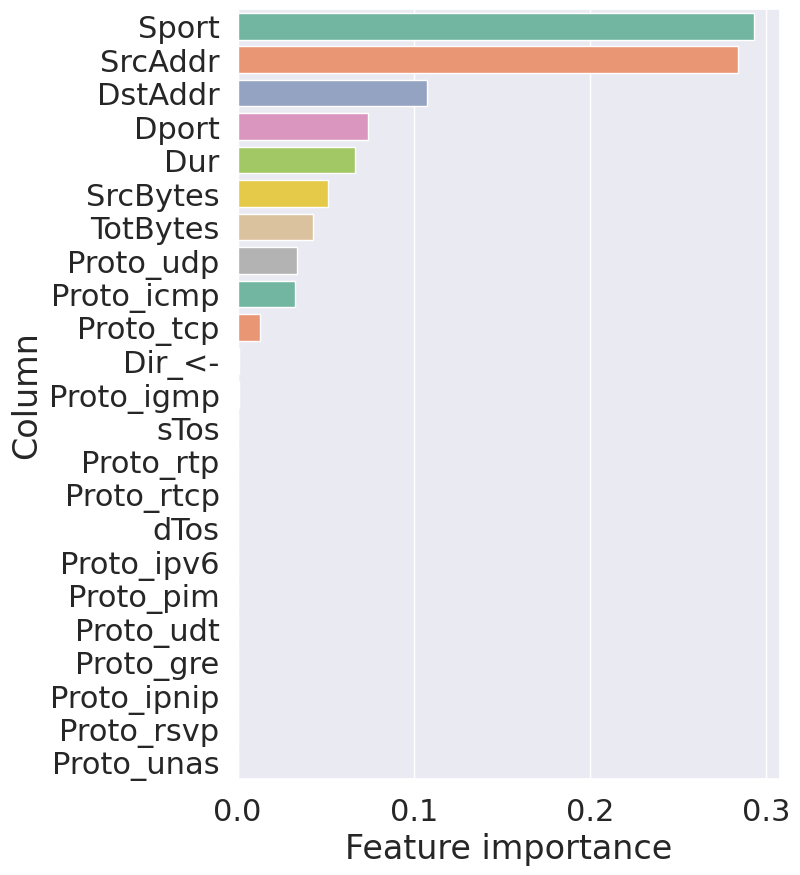

In [ ]:
feature_names = OH_train_set.drop(labels = ['Target'], axis = 1).columns

features_importance = pd.DataFrame(
    {
        'Column': feature_names,
        'Feature importance': RFclassifier.feature_importances_
    }
).sort_values('Feature importance', ascending = False)

sns.set(font_scale = 2)
fig, ax = plt.subplots(figsize = (7, 10))
ax = sns.barplot(x = "Feature importance", y = "Column", data = features_importance, palette = "Set2", orient = 'h');

## XGBoost

In [ ]:
import xgboost

XGBclassifier = xgboost.XGBClassifier(random_state = 42)

XGBclassifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [ ]:
print_score(XGBclassifier, X_train, y_train, X_test, y_test)




TRAINING RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000    355709
           1     1.0000    1.0000    1.0000    355709

    accuracy                         1.0000    711418
   macro avg     1.0000    1.0000    1.0000    711418
weighted avg     1.0000    1.0000    1.0000    711418


ROC AUC Score: 1.0

Confusion Matrix:
[[355709      0]
 [     0 355709]]




TEST RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000   3881234
           1     0.9992    1.0000    0.9996     88927

    accuracy                         1.0000   3970161
   macro avg     0.9996    1.0000    0.9998   3970161
weighted avg     1.0000    1.0000    1.0000   3970161


ROC AUC Score: 0.9999849731851218

Confusion Matrix:
[[3881161      73]
 [      1   88926]]






In [ ]:
print_score(XGBclassifier, X_train, y_train, X_test_2, y_test_2)




TRAINING RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000    355709
           1     1.0000    1.0000    1.0000    355709

    accuracy                         1.0000    711418
   macro avg     1.0000    1.0000    1.0000    711418
weighted avg     1.0000    1.0000    1.0000    711418


ROC AUC Score: 1.0

Confusion Matrix:
[[355709      0]
 [     0 355709]]




TEST RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000    113941
           1     0.9844    1.0000    0.9921        63

    accuracy                         1.0000    114004
   macro avg     0.9922    1.0000    0.9961    114004
weighted avg     1.0000    1.0000    1.0000    114004


ROC AUC Score: 0.9999956117639831

Confusion Matrix:
[[113940      1]
 [     0     63]]






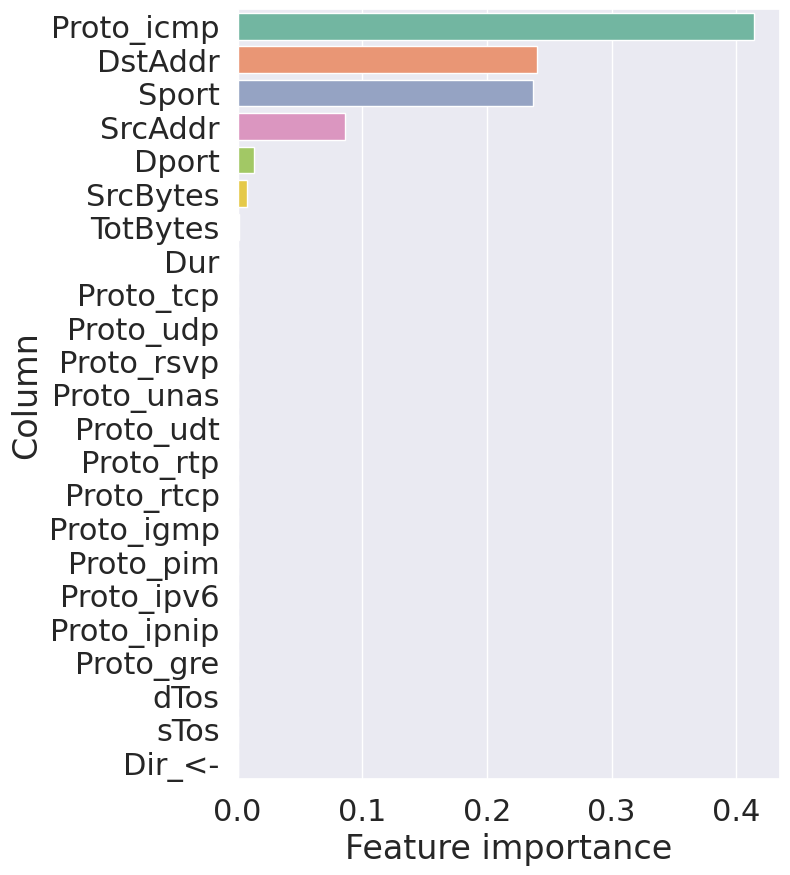

In [ ]:
feature_names = OH_train_set.drop(labels = ['Target'], axis = 1).columns

features_importance = pd.DataFrame(
    {
        'Column': feature_names,
        'Feature importance': XGBclassifier.feature_importances_
    }
).sort_values('Feature importance', ascending = False)

sns.set(font_scale = 2)
fig, ax = plt.subplots(figsize = (7, 10))
ax = sns.barplot(x = "Feature importance", y = "Column", data = features_importance, palette = "Set2", orient = 'h');

## LightGBM

In [ ]:
from lightgbm import LGBMClassifier

LGBMclassifier = LGBMClassifier(random_state = 42)

LGBMclassifier.fit(X_train, y_train)

LGBMClassifier(random_state=42)

In [ ]:
print_score(LGBMclassifier, X_train, y_train, X_test, y_test)




TRAINING RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000    355709
           1     1.0000    1.0000    1.0000    355709

    accuracy                         1.0000    711418
   macro avg     1.0000    1.0000    1.0000    711418
weighted avg     1.0000    1.0000    1.0000    711418


ROC AUC Score: 1.0

Confusion Matrix:
[[355709      0]
 [     0 355709]]




TEST RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000   3881234
           1     0.9982    1.0000    0.9991     88927

    accuracy                         1.0000   3970161
   macro avg     0.9991    1.0000    0.9995   3970161
weighted avg     1.0000    1.0000    1.0000   3970161


ROC AUC Score: 0.9999788726987345

Confusion Matrix:
[[3881070     164]
 [      0   88927]]






In [ ]:
print_score(LGBMclassifier, X_train, y_train, X_test_2, y_test_2)




TRAINING RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000    355709
           1     1.0000    1.0000    1.0000    355709

    accuracy                         1.0000    711418
   macro avg     1.0000    1.0000    1.0000    711418
weighted avg     1.0000    1.0000    1.0000    711418


ROC AUC Score: 1.0

Confusion Matrix:
[[355709      0]
 [     0 355709]]




TEST RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     1.0000    0.9999    1.0000    113941
           1     0.8630    1.0000    0.9265        63

    accuracy                         0.9999    114004
   macro avg     0.9315    1.0000    0.9632    114004
weighted avg     0.9999    0.9999    0.9999    114004


ROC AUC Score: 0.9999561176398312

Confusion Matrix:
[[113931     10]
 [     0     63]]






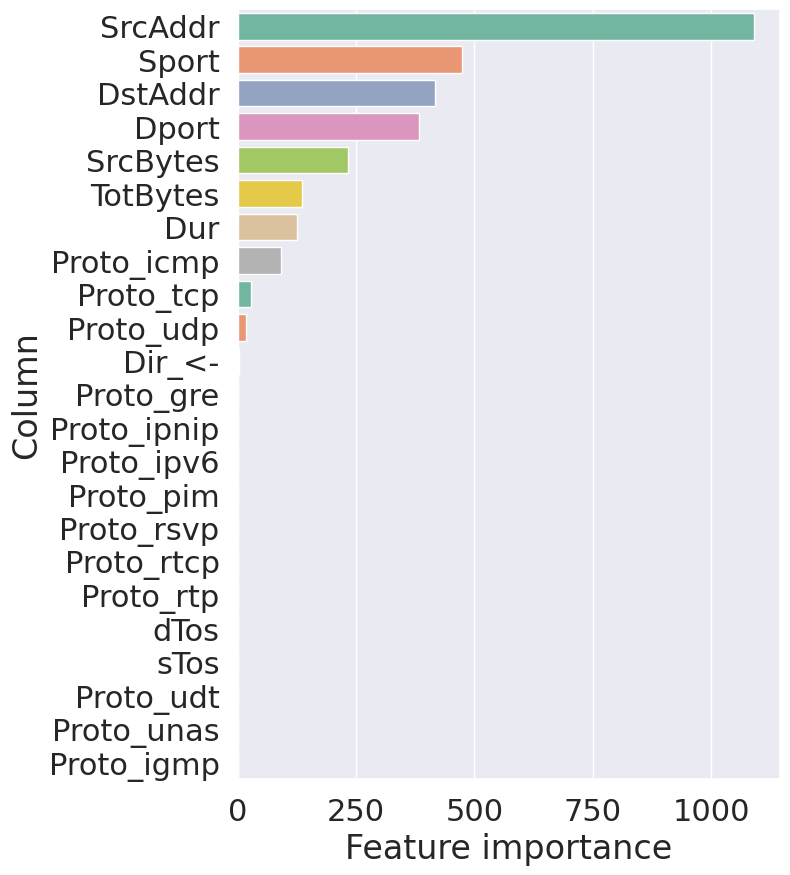

In [ ]:
feature_names = OH_train_set.drop(labels = ['Target'], axis = 1).columns

features_importance = pd.DataFrame(
    {
        'Column': feature_names,
        'Feature importance': LGBMclassifier.feature_importances_
    }
).sort_values('Feature importance', ascending = False)

sns.set(font_scale = 2)
fig, ax = plt.subplots(figsize = (7, 10))
ax = sns.barplot(x = "Feature importance", y = "Column", data = features_importance, palette = "Set2", orient = 'h');

## Artificial Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import pandas as pd
import numpy as np
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

from sklearn import datasets

In [ ]:
ANNclassifier = tf.keras.Sequential([
    tf.keras.layers.Input(shape = X_train.shape[1]),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

In [ ]:
ANNclassifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                240       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


In [ ]:
ANNclassifier.layers

In [ ]:
ANNclassifier.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = ANNclassifier.fit(X_train, y_train, epochs=20)

Epoch 1/20
22232/22232 [==============================] - 32s 1ms/step - loss: 0.3780 - accuracy: 0.8258
Epoch 2/20
22232/22232 [==============================] - 32s 1ms/step - loss: 1.6150 - accuracy: 0.8252
Epoch 3/20
22232/22232 [==============================] - 32s 1ms/step - loss: 0.3850 - accuracy: 0.8288
Epoch 4/20
22232/22232 [==============================] - 32s 1ms/step - loss: 0.3806 - accuracy: 0.8215
Epoch 5/20
22232/22232 [==============================] - 32s 1ms/step - loss: 6.6978 - accuracy: 0.8479
Epoch 6/20
22232/22232 [==============================] - 33s 1ms/step - loss: 0.6056 - accuracy: 0.8329
Epoch 7/20
22232/22232 [==============================] - 33s 1ms/step - loss: 0.5450 - accuracy: 0.8545
Epoch 8/20
22232/22232 [==============================] - 32s 1ms/step - loss: 13.2205 - accuracy: 0.8335
Epoch 9/20
22232/22232 [==============================] - 32s 1ms/step - loss: 2.3633 - accuracy: 0.8378
Epoch 10/20
22232/22232 [=============================

In [ ]:
loss, accuracy = ANNclassifier.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

124068/124068 [==============================] - 144s 1ms/step - loss: 0.3040 - accuracy: 0.8329
Test loss: 0.3039529621601105
Test accuracy: 0.8329342603683472


In [ ]:
y_test_pred = ANNclassifier.predict(X_test)

124068/124068 [==============================] - 127s 1ms/step


ValueError: ignored

In [ ]:
y_test_pred = pd.Series([int(i > .5) for i in y_test_pred])

# Evaluation
print(f'Classification Report:\n{classification_report(y_test, y_test_pred, digits = 4)}\n')

print(f'ROC AUC Score: {roc_auc_score(y_test, y_test_pred)}\n')

print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_test_pred)}\n')
    
# metrics.ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)

Classification Report:
              precision    recall  f1-score   support

           0     0.9948    0.8335    0.9070   3881234
           1     0.1001    0.8086    0.1782     88927

    accuracy                         0.8329   3970161
   macro avg     0.5474    0.8210    0.5426   3970161
weighted avg     0.9747    0.8329    0.8907   3970161


ROC AUC Score: 0.8210383504960316

Confusion Matrix:
[[3234978  646256]
 [  17022   71905]]



In [ ]:
loss, accuracy = ANNclassifier.evaluate(X_test_2, y_test_2)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

3563/3563 [==============================] - 5s 1ms/step - loss: 0.3050 - accuracy: 0.8394
Test loss: 0.3050483763217926
Test accuracy: 0.8394442200660706


In [ ]:
y_test_2_pred = ANNclassifier.predict(X_test_2)

y_test_2_pred = pd.Series([int(i > .5) for i in y_test_2_pred])
# Evaluation
print(f'Classification Report:\n{classification_report(y_test_2, y_test_2_pred, digits = 4)}\n')

print(f'ROC AUC Score: {roc_auc_score(y_test_2, y_test_2_pred)}\n')

print(f'Confusion Matrix:\n{confusion_matrix(y_test_2, y_test_2_pred)}\n')
    
# metrics.ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)

3563/3563 [==============================] - 3s 935us/step
Classification Report:
              precision    recall  f1-score   support

           0     0.9996    0.8397    0.9127    113941
           1     0.0014    0.4127    0.0028        63

    accuracy                         0.8394    114004
   macro avg     0.5005    0.6262    0.4578    114004
weighted avg     0.9991    0.8394    0.9122    114004


ROC AUC Score: 0.626189299028751

Confusion Matrix:
[[95674 18267]
 [   37    26]]

